In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import statistics 
from scipy.stats import norm 
import matplotlib.ticker as mtick

## Read the dataset, remove $, %, etc from number values.
dataset = pd.read_csv('crime-housing-austin-2015.csv')
dataset['Medianhouseholdincome'] = dataset['Medianhouseholdincome'].str.replace('$', '').astype('float')
dataset['Unemployment'] = dataset['Unemployment'].str.replace('%', '').astype('float')
dataset['Medianrent'] = dataset['Medianrent'].str.replace('$', '').astype('float')
dataset['Averagemonthlytransportationcost'] = dataset['Averagemonthlytransportationcost'].str.replace('$', '').astype('float')

dataset['Percentageofrentalunitsinpoorcondition'] = dataset['Percentageofrentalunitsinpoorcondition'].str.replace('%', '').astype('float')

## Drop any values with NA or nan
dataset= dataset.dropna()

## This just basically takes each occurence of the zip codes, all of the values are the same for each zip code
datasetGrouped = dataset.groupby(['Zip_Code_Crime']).agg({'Medianhouseholdincome':'first', 'Unemployment':'first','Medianrent':'first', 'Percentageofrentalunitsinpoorcondition' : 'first', 'Averagemonthlytransportationcost':'first'}).reset_index()





## Grabs the number of values for each zip code (number of crimes in each zip code)
occurrences_per_value = dataset['Zip_Code_Crime'].value_counts().reset_index()

## Merge the top two datasets.
mergedDatasets = pd.merge(occurrences_per_value, datasetGrouped, on='Zip_Code_Crime')

In [37]:
## open up the other dataset

zipCodes = pd.read_csv('AustinZipCodes.csv')
zipCodes['Population'] = zipCodes['Population'].str.replace(',', '').astype('float')

zipCodes['Population'] = zipCodes['Population'].astype(int)
mergedDatasets.rename(columns={'Zip_Code_Crime': 'Zip Code'}, inplace=True)

## Merge zip codes with population and zip codes with number of crimes
zipCodesPopulationAndCrimes = pd.merge(mergedDatasets, zipCodes, on='Zip Code')



PearsonRResult(statistic=0.19415666616251118, pvalue=0.2637349808399133)

PearsonRResult(statistic=0.5115121202434136, pvalue=0.001988710150291236)

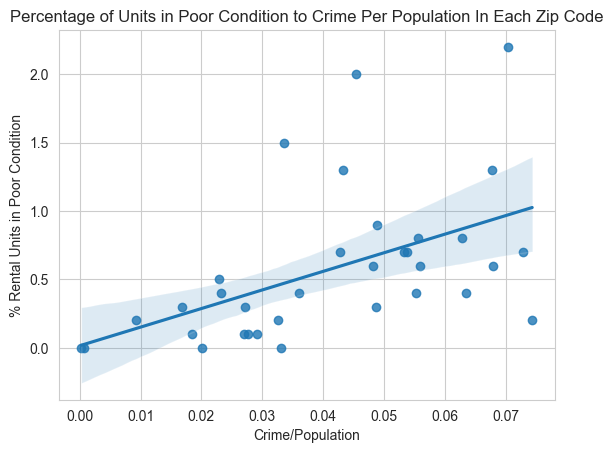

In [38]:

## Create ratio in dataset
zipCodesPopulationAndCrimes['Crime/Population'] = zipCodesPopulationAndCrimes['count'] / zipCodesPopulationAndCrimes['Population']

## Get p - value of dataset and graph (with outlier)
zipCodesPopulationAndCrimes.rename(columns={'Percentageofrentalunitsinpoorcondition': '% Rental Units in Poor Condition'}, inplace=True)
display(stats.pearsonr(zipCodesPopulationAndCrimes['% Rental Units in Poor Condition'], zipCodesPopulationAndCrimes['Crime/Population']))

## Get p - value of dataset and graph (without outlier)

zipCodesPopulationAndCrimes = zipCodesPopulationAndCrimes[zipCodesPopulationAndCrimes['Crime/Population'] < 0.5]

sns.regplot(x='Crime/Population', y='% Rental Units in Poor Condition',data=zipCodesPopulationAndCrimes)

plt.title('Percentage of Units in Poor Condition to Crime Per Population In Each Zip Code')
display(stats.pearsonr(zipCodesPopulationAndCrimes['% Rental Units in Poor Condition'], zipCodesPopulationAndCrimes['Crime/Population']))


PearsonRResult(statistic=0.5739289260982752, pvalue=0.00038682038598623875)

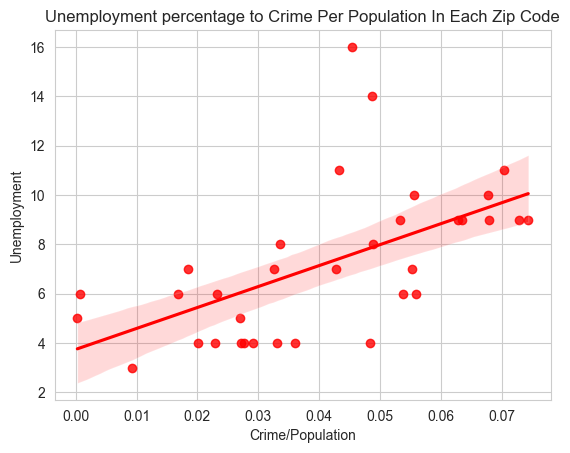

In [39]:


## Unemployment comparison with Crime per Population
sns.regplot(x='Crime/Population', y='Unemployment',data=zipCodesPopulationAndCrimes, color='red')
plt.title('Unemployment percentage to Crime Per Population In Each Zip Code')

display(stats.pearsonr(zipCodesPopulationAndCrimes['Unemployment'], zipCodesPopulationAndCrimes['Crime/Population']))


,index,monthReported,crimesThisMonth,expectedCrimesThisMonth,expectedCrimesPercentage
0,0,Jan,2819,2953.832877,0.954353
1,293,Feb,2671,2667.978082,1.001133
2,531,Mar,2911,2953.832877,0.985499
3,820,Apr,2919,2858.547945,1.021148
4,1098,May,3017,2953.832877,1.021385
5,1405,Jun,2920,2858.547945,1.021498
6,1684,Jul,3199,2953.832877,1.083000
7,1986,Aug,3045,2953.832877,1.030864
8,2297,Sep,2863,2858.547945,1.001557
9,2596,Oct,2770,2953.832877,0.937765


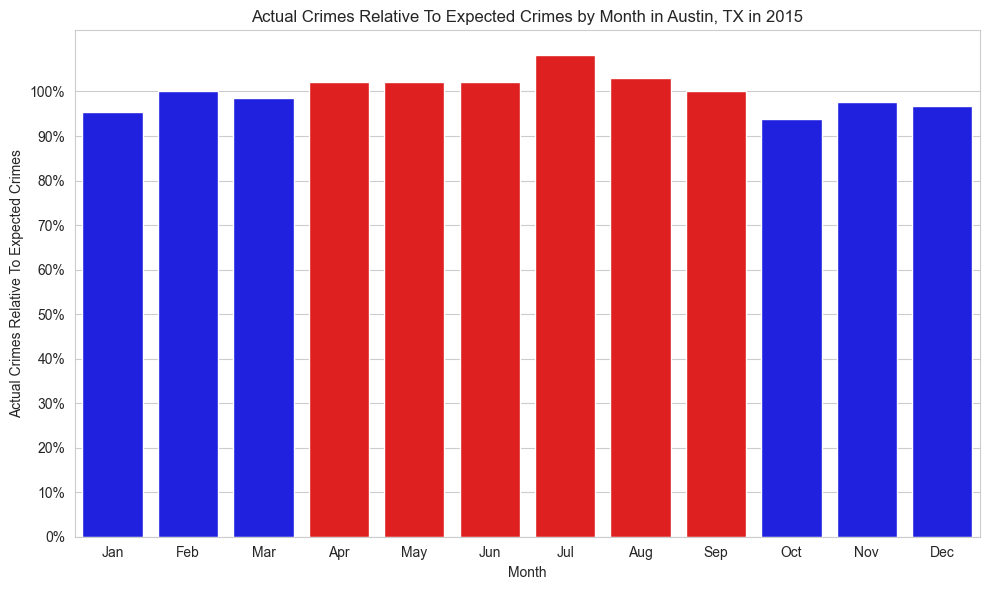

TtestResult(statistic=4.09570972123271, pvalue=0.002159353157463508, df=10.0)
Summer month crime average: 102.99%
Summer month crime std dev: 2.53%
Winter month crime average: 97.02%
Winter month crime std dev: 2.05%


In [40]:
# Add new columns to table analyzing month of crime
pd.set_option('display.max_columns', None)
crimes = pd.read_csv('crime-housing-austin-2015.csv')

zips = zipCodes

# Removing the .0 suffix on the zip codes in the crimes table, converting to ints
crimes['Zip_Code_Crime'] = crimes['Zip_Code_Crime'].astype(str).str[:-2]
crimes = crimes[crimes['Zip_Code_Crime'].str.isnumeric()]
crimes['Zip_Code_Crime'] = crimes['Zip_Code_Crime'].astype('int64')


# Merging the two tables
crimeData = pd.merge(crimes, zips, left_on='Zip_Code_Crime', right_on='Zip Code', how='inner')
crimeData.dropna(inplace=True)


# Cleaning symbols like $ or % out of table so that columns of interest can be easily analyzed



# Adding new columns to table that will be useful for analysis
crimeData['crime_count'] = crimeData.groupby('Zip_Code_Crime')['Zip_Code_Crime'].transform('count')
crimeData['crimes_per_person'] = crimeData['crime_count'] / crimeData['Population']
crimeData['monthReported'] = crimeData['Report_Date'].str.extract(r'(\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\b)')
crimeData['crimesThisMonth'] = crimeData.groupby('monthReported')['monthReported'].transform('count')
crimesByMonth = crimeData[['monthReported', 'crimesThisMonth']].drop_duplicates().reset_index()


days_in_month = {
    'Jan': 31, 'Feb': 28, 'Mar': 31,
    'Apr': 30, 'May': 31, 'Jun': 30,
    'Jul': 31, 'Aug': 31, 'Sep': 30,
    'Oct': 31, 'Nov': 30, 'Dec': 31
}


crimesByMonth['expectedCrimesThisMonth'] = len(crimeData) * crimesByMonth['monthReported'].map(days_in_month) / 365
crimesByMonth['expectedCrimesPercentage'] = crimesByMonth['crimesThisMonth'] / crimesByMonth['expectedCrimesThisMonth']


display(crimesByMonth)


# Split crime table into a "summer" half and "winter" half
summer_months = crimesByMonth[crimesByMonth['monthReported'].str.contains('Apr|May|Jun|Jul|Aug|Sep')]
winter_months = crimesByMonth[~crimesByMonth['monthReported'].str.contains('Apr|May|Jun|Jul|Aug|Sep')]


# Set up bar chart for crimes by month
sns.set_style("whitegrid")
colors = ['blue' if month in ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'] else 'red' for month in crimesByMonth['monthReported']]
plt.figure(figsize=(10, 6))
sns.barplot(x='monthReported', y='expectedCrimesPercentage', data=crimesByMonth, hue='monthReported', palette=colors, legend=False)
plt.xlabel('Month')
plt.ylabel('Actual Crimes Relative To Expected Crimes')
plt.title('Actual Crimes Relative To Expected Crimes by Month in Austin, TX in 2015')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()


# T-test suggests that summer months have disproportionately high crime rates
print(stats.ttest_ind(summer_months['expectedCrimesPercentage'], winter_months['expectedCrimesPercentage']))
print(f"Summer month crime average: {round(summer_months['expectedCrimesPercentage'].mean() * 100, 2)}%")
print(f"Summer month crime std dev: {round(np.std(summer_months['expectedCrimesPercentage']) * 100, 2)}%")
print(f"Winter month crime average: {round(winter_months['expectedCrimesPercentage'].mean() * 100, 2)}%")
print(f"Winter month crime std dev: {round(np.std(winter_months['expectedCrimesPercentage']) * 100, 2)}%")